# <span style="color:green">Predicting House Prices in King County, USA.</span>

The task of this chalange is to predict of prices based on other features for beginners (like me) in field of machine learning. At the end, different regression models are compared and evaluated. 

This task consists of three steps:
* **1- Preprocessing:**
    * Data Preprocessing
    * Data wrangling
    * Visualization
* **2- Model selection:**
    * Train-Test Split
    * Scaling
    * Regressor selection
    * Cross validation
    * Prediction
    * Visualization
* **3- Evaluation:**
    * Scores comparison
    * Visualization

## <span style="color:darkblue">1- Preprocessing:</span>

### 1.1 Data Preprocessing

In [212]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%matplotlib inline

## Ignoring of warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Setting of print Data
np.set_printoptions(formatter={'all':lambda x:'%.3f'%x})


## Definition of font size
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

In [209]:
## Import Data
df=pd.read_csv('kc_house_data.csv')
dtale.show(df)

Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\Pouria\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Pouria\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Pouria\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\Pouria\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\Pouria\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Pouria\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\Pouria\anaconda3\lib\site-packages\dash\dash.py", line 1076, in dispatc

2021-01-17 21:25:30,971 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\Pouria\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Pouria\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Pouria\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\Pouria\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\Pouria\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Pouria\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\Pouria\anaconda3\lib\site-packages

In [179]:
## Information about DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [180]:
## ZERO values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 1.2 Visualisation

Discovering of correlation between features via heatmap. So we can make a decision, which features could be dropping out

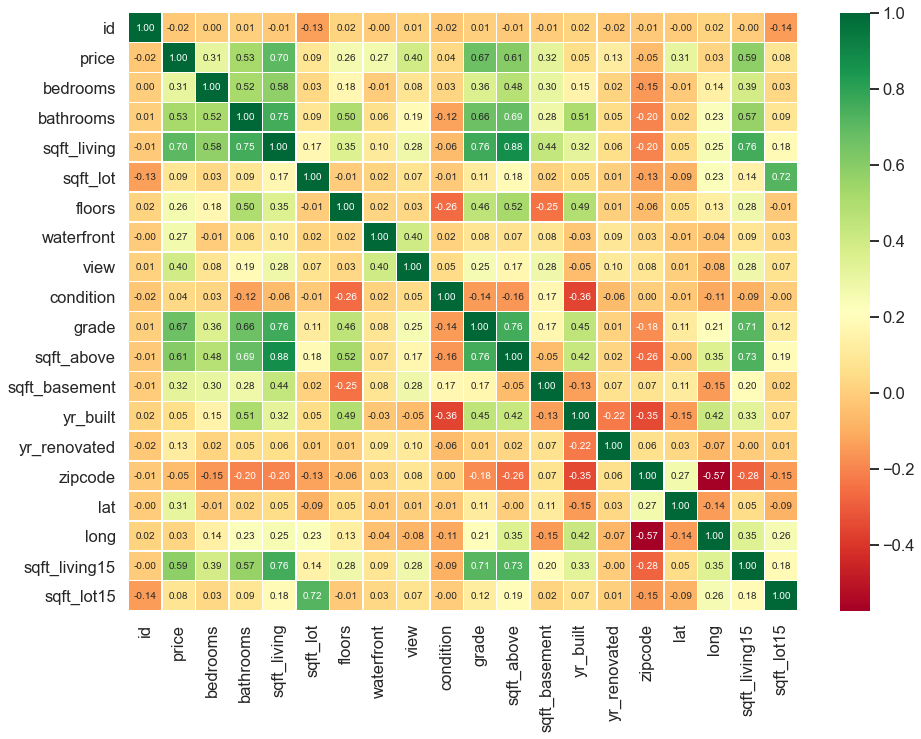

In [195]:
f, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(df.corr(),annot=True, fmt=".2f", linewidths=.5, ax=ax,cmap='RdYlGn')
plt.show()

The outliers and their desributions can so be better illustrated.

In [92]:
#price

#Q1 & Q2 defination
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['price'] = np.where(df['price']>upper_limit,upper_limit,df['price'])
df['price'] = np.where(df['price']<lower_limit,lower_limit,df['price'])

Q1: 321950.0
Q3:  645000.0
IQR:  323050.0
Lower limit:  -162625.0
Upper limit:  1129575.0


In [93]:
#bedrooms

#Q1 & Q2 defination
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['bedrooms'] = np.where(df['bedrooms']>upper_limit,upper_limit,df['bedrooms'])
df['bedrooms'] = np.where(df['bedrooms']<lower_limit,lower_limit,df['bedrooms'])

Q1: 3.0
Q3:  4.0
IQR:  1.0
Lower limit:  1.5
Upper limit:  5.5


In [94]:
#bathrooms

#Q1 & Q2 defination
Q1 = df['bathrooms'].quantile(0.25)
Q3 = df['bathrooms'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['bathrooms'] = np.where(df['bathrooms']>upper_limit,upper_limit,df['bathrooms'])
df['bathrooms'] = np.where(df['bathrooms']<lower_limit,lower_limit,df['bathrooms'])

Q1: 1.75
Q3:  2.5
IQR:  0.75
Lower limit:  0.625
Upper limit:  3.625


In [95]:
#sqft_living

#Q1 & Q2 defination
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['sqft_living'] = np.where(df['sqft_living']>upper_limit,upper_limit,df['sqft_living'])
df['sqft_living'] = np.where(df['sqft_living']<lower_limit,lower_limit,df['sqft_living'])

Q1: 1427.0
Q3:  2550.0
IQR:  1123.0
Lower limit:  -257.5
Upper limit:  4234.5


In [96]:
#sqft_lot

#Q1 & Q2 defination
Q1 = df['sqft_lot'].quantile(0.25)
Q3 = df['sqft_lot'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['sqft_lot'] = np.where(df['sqft_lot']>upper_limit,upper_limit,df['sqft_lot'])
df['sqft_lot'] = np.where(df['sqft_lot']<lower_limit,lower_limit,df['sqft_lot'])

Q1: 5040.0
Q3:  10688.0
IQR:  5648.0
Lower limit:  -3432.0
Upper limit:  19160.0


In [97]:
#floors

#Q1 & Q2 defination
Q1 = df['floors'].quantile(0.25)
Q3 = df['floors'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['floors'] = np.where(df['floors']>upper_limit,upper_limit,df['floors'])
df['floors'] = np.where(df['floors']<lower_limit,lower_limit,df['floors'])

Q1: 1.0
Q3:  2.0
IQR:  1.0
Lower limit:  -0.5
Upper limit:  3.5


In [98]:
#condition

#Q1 & Q2 defination
Q1 = df['condition'].quantile(0.25)
Q3 = df['condition'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['condition'] = np.where(df['condition']>upper_limit,upper_limit,df['condition'])
df['condition'] = np.where(df['condition']<lower_limit,lower_limit,df['condition'])

Q1: 3.0
Q3:  4.0
IQR:  1.0
Lower limit:  1.5
Upper limit:  5.5


In [99]:
#grade

#Q1 & Q2 defination
Q1 = df['grade'].quantile(0.25)
Q3 = df['grade'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['grade'] = np.where(df['grade']>upper_limit,upper_limit,df['grade'])
df['grade'] = np.where(df['grade']<lower_limit,lower_limit,df['grade'])

Q1: 7.0
Q3:  8.0
IQR:  1.0
Lower limit:  5.5
Upper limit:  9.5


In [100]:
#sqft_above

#Q1 & Q2 defination
Q1 = df['sqft_above'].quantile(0.25)
Q3 = df['sqft_above'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['sqft_above'] = np.where(df['sqft_above']>upper_limit,upper_limit,df['sqft_above'])
df['sqft_above'] = np.where(df['sqft_above']<lower_limit,lower_limit,df['sqft_above'])

Q1: 1190.0
Q3:  2210.0
IQR:  1020.0
Lower limit:  -340.0
Upper limit:  3740.0


In [101]:
#sqft_basement

#Q1 & Q2 defination
Q1 = df['sqft_basement'].quantile(0.25)
Q3 = df['sqft_basement'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['sqft_basement'] = np.where(df['sqft_basement']>upper_limit,upper_limit,df['sqft_basement'])
df['sqft_basement'] = np.where(df['sqft_basement']<lower_limit,lower_limit,df['sqft_basement'])

Q1: 0.0
Q3:  560.0
IQR:  560.0
Lower limit:  -840.0
Upper limit:  1400.0


In [102]:
#yr_built

#Q1 & Q2 defination
Q1 = df['yr_built'].quantile(0.25)
Q3 = df['yr_built'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['yr_built'] = np.where(df['yr_built']>upper_limit,upper_limit,df['yr_built'])
df['yr_built'] = np.where(df['yr_built']<lower_limit,lower_limit,df['yr_built'])

Q1: 1951.0
Q3:  1997.0
IQR:  46.0
Lower limit:  1882.0
Upper limit:  2066.0


In [103]:
#lat

#Q1 & Q2 defination
Q1 = df['lat'].quantile(0.25)
Q3 = df['lat'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['lat'] = np.where(df['lat']>upper_limit,upper_limit,df['lat'])
df['lat'] = np.where(df['lat']<lower_limit,lower_limit,df['lat'])

Q1: 47.471000000000004
Q3:  47.678000000000004
IQR:  0.20700000000000074
Lower limit:  47.1605
Upper limit:  47.9885


In [183]:
#long

#Q1 & Q2 defination
Q1 = df['long'].quantile(0.25)
Q3 = df['long'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['long'] = np.where(df['long']>upper_limit,upper_limit,df['long'])
df['long'] = np.where(df['long']<lower_limit,lower_limit,df['long'])

Q1: -122.32799999999999
Q3:  -122.125
IQR:  0.20299999999998875
Lower limit:  -122.63249999999996
Upper limit:  -121.82050000000001
Executing shutdown due to inactivity...


2021-01-16 18:33:03,457 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-01-16 18:33:11,490 - INFO     - Executing shutdown...


In [105]:
#sqft_living15

#Q1 & Q2 defination
Q1 = df['sqft_living15'].quantile(0.25)
Q3 = df['sqft_living15'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['sqft_living15'] = np.where(df['sqft_living15']>upper_limit,upper_limit,df['sqft_living15'])
df['sqft_living15'] = np.where(df['sqft_living15']<lower_limit,lower_limit,df['sqft_living15'])

Q1: 1490.0
Q3:  2360.0
IQR:  870.0
Lower limit:  185.0
Upper limit:  3665.0


In [106]:
#sqft_living15

#Q1 & Q2 defination
Q1 = df['sqft_lot15'].quantile(0.25)
Q3 = df['sqft_lot15'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['sqft_lot15'] = np.where(df['sqft_lot15']>upper_limit,upper_limit,df['sqft_lot15'])
df['sqft_lot15'] = np.where(df['sqft_lot15']<lower_limit,lower_limit,df['sqft_lot15'])

Q1: 5100.0
Q3:  10083.0
IQR:  4983.0
Lower limit:  -2374.5
Upper limit:  17557.5


<AxesSubplot:xlabel='sqft_lot15'>

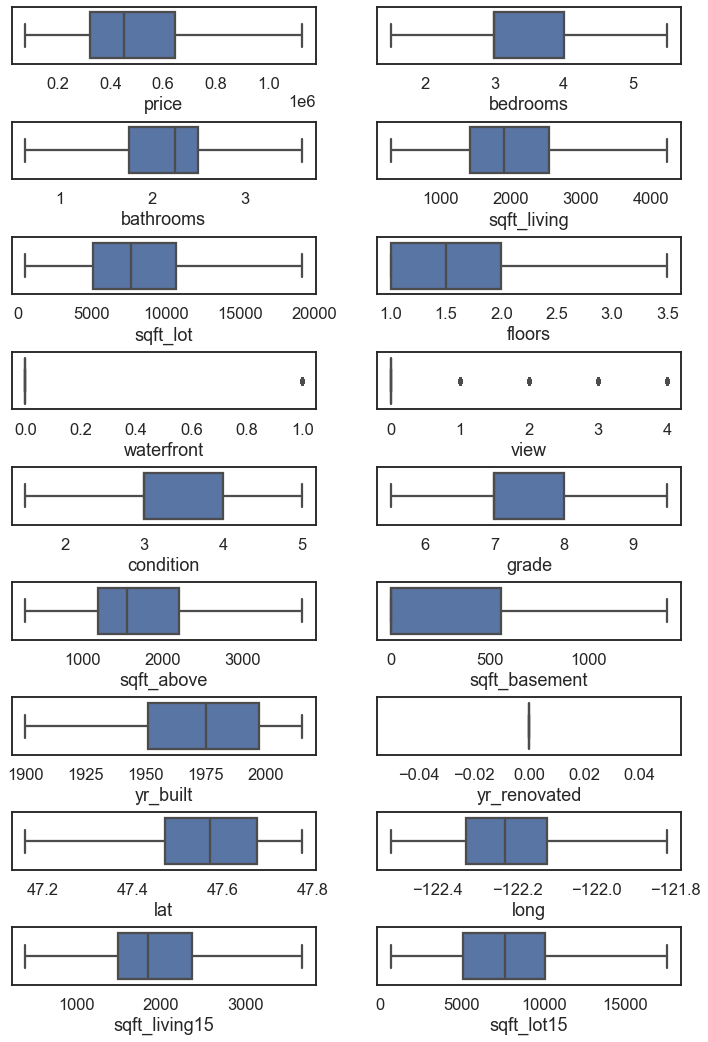

In [107]:
## Adjustments
f,ax=plt.subplots(figsize=(12, 18),nrows=9,ncols=2)
plt.subplots_adjust(hspace=1)
## Features
sns.boxplot(df['price'],data=df,ax=ax[0][0])
sns.boxplot(df['bedrooms'],data=df,ax=ax[0][1])
sns.boxplot(df['bathrooms'],data=df,ax=ax[1][0])
sns.boxplot(df['sqft_living'],data=df,ax=ax[1][1])
sns.boxplot(df['sqft_lot'],data=df,ax=ax[2][0])
sns.boxplot(df['floors'],data=df,ax=ax[2][1])
sns.boxplot(df['waterfront'],data=df,ax=ax[3][0])
sns.boxplot(df['view'],data=df,ax=ax[3][1])
sns.boxplot(df['condition'],data=df,ax=ax[4][0])
sns.boxplot(df['grade'],data=df,ax=ax[4][1])
sns.boxplot(df['sqft_above'],data=df,ax=ax[5][0])
sns.boxplot(df['sqft_basement'],data=df,ax=ax[5][1])
sns.boxplot(df['yr_built'],data=df,ax=ax[6][0])
sns.boxplot(df['yr_renovated'],data=df,ax=ax[6][1])
sns.boxplot(df['lat'],data=df,ax=ax[7][0])
sns.boxplot(df['long'],data=df,ax=ax[7][1])
sns.boxplot(df['sqft_living15'],data=df,ax=ax[8][0])
sns.boxplot(df['sqft_lot15'],data=df,ax=ax[8][1])

# Train Test Split

In [108]:
df.drop(['id','date','zipcode'],axis=1,inplace=True)

In [157]:
model = []
score = []

model_pred = []
score_pred = []

x=df.drop(['price'],axis=1)
y=df['price']

#Spliting Train/Test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Scores
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [110]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train,y_train)
x_test=scaler.transform(x_test)

In [111]:
# Model libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [204]:
from sklearn.model_selection import  GridSearchCV

# Cross-Validation 

Score:  0.7483301750085904


Text(0.5, 1.0, 'CV-prediction with LinearRegression')

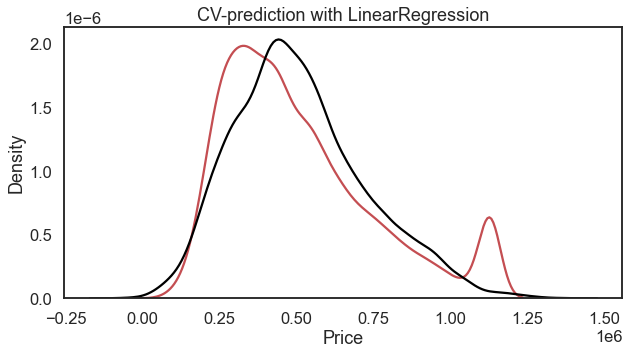

In [112]:
#LinearRegression

LinReg=LinearRegression()
LinReg.fit(x_train,y_train)


cv_LinReg=cross_val_score(LinReg,x_train,y_train,cv=10)
cv_LinReg_pred=cross_val_predict(LinReg,x_train,y_train,cv=10)

print("Score: ",r2_score(y_train,cv_LinReg_pred))
model.append("Linear Regression")
score.append(r2_score(y_train,cv_LinReg_pred))


#Visualisation
fig,ax=plt.subplots(figsize=(10, 5))
plt.rc('font', size=5)  
ax=sns.distplot(y_train,hist=False,color='r')
sns.distplot(cv_LinReg_pred,hist=False,color='black',ax=ax)
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("CV-prediction with LinearRegression")

[0.748 0.748 0.748 0.748 0.742 0.697 0.638]
Score:  0.7483130869497296


Text(0.5, 1.0, 'CV-prediction with RidgeRegression')

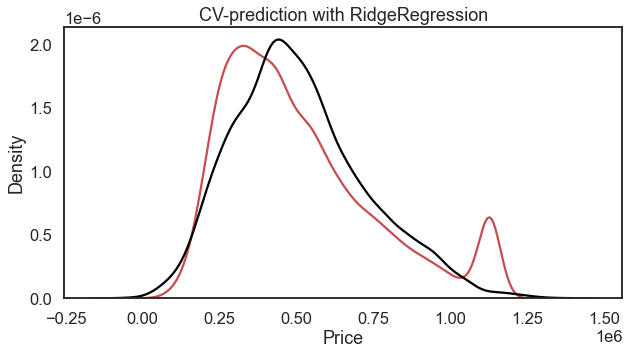

In [203]:
Rge=Ridge(alpha=0.1)
Rge.fit(x_train,y_train)



#Best parmeter of alpha-estimator
parameters1=[{'alpha':[0.001,0.1,1,10,100,1000,10000]}]
Grid1=GridSearchCV(Rge,parameters1,cv=10)
Grid1.fit(x_train,y_train)
Grid1.best_estimator_
scores=Grid1.cv_results_
print(scores['mean_test_score'])


from sklearn.model_selection import  cross_val_score,cross_val_predict
cv_Rge=cross_val_score(Rge,x_train,y_train,cv=15)
cv_Rge_pred=cross_val_predict(Rge,x_train,y_train,cv=15)

print("Score: ",r2_score(y_train,cv_Rge_pred))
model.append("Ridge")
score.append(r2_score(y_train,cv_Rge_pred))


#Visualisation
fig,ax=plt.subplots(figsize=(10, 5))
plt.rc('font', size=5)  
ax=sns.distplot(y_train,hist=False,color='r')
sns.distplot(cv_Rge_pred,hist=False,color='black',ax=ax)
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("CV-prediction with RidgeRegression")

In [ ]:
##Lasso

LSO=Lasso()
LSO.fit(x_train,y_train)

#Best parmeter of alpha-estimator


from sklearn.model_selection import cross_val_score,cross_val_predict
cv_LSO=cross_val_score(LSO,x_train,y_train,cv=10)
cv_LSO_pred=cross_val_predict(LSO,x_train,y_train,cv=10)

print("Score: ",r2_score(y_train,cv_LSO_pred))
model.append("Lasso")
score.append(r2_score(y_train,cv_LSO_pred))

#Visualisation
f,ax3=plt.subplots(figsize=(10, 5))
ax3=sns.distplot(y_train,hist=False,label='Y-Train',color='r')
sns.distplot(cv_LSO_pred,hist=False,label='Y-Pred-CV',ax=ax3,color='black')
plt.title("CV-prediction with Lasso")

Score:  0.7128732290652533


Text(0.5, 1.0, 'CV-prediction with ElasticNet')

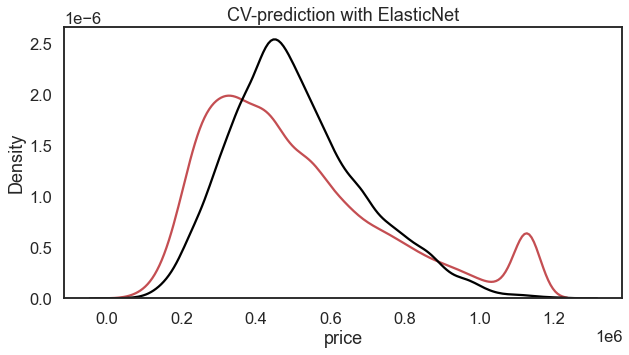

In [115]:
##ElasticNet

ELN=ElasticNet(random_state=42)
ELN.fit(x_train,y_train)

from sklearn.model_selection import  cross_val_score,cross_val_predict
cv_ELN=cross_val_score(ELN,x_train,y_train,cv=10)
cv_ELN_pred=cross_val_predict(ELN,x_train,y_train,cv=10)

print("Score: ",r2_score(y_train,cv_ELN_pred))
model.append("ElasticNet")
score.append(r2_score(y_train,cv_ELN_pred)) 

#Visalisation
f,ax3=plt.subplots(figsize=(10, 5))
ax3=sns.distplot(y_train,hist=False,label='Y-Train',color='r')
sns.distplot(cv_ELN_pred,hist=False,label='Y-Pred-CV',ax=ax3,color='black')
plt.title("CV-prediction with ElasticNet")

Score:  0.7787102730281187


Text(0.5, 1.0, 'CV-prediction with DecisionTreeRegressor')

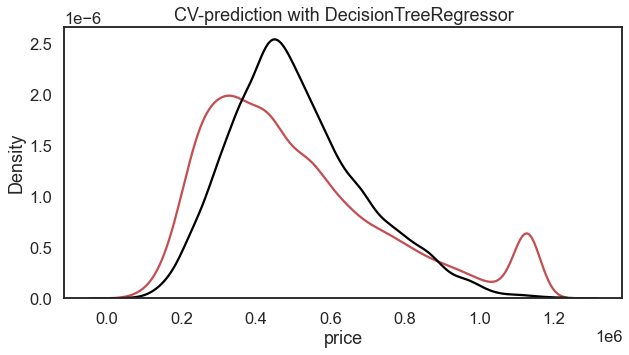

In [116]:
##Decision-Tree-Regressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

from sklearn.model_selection import  cross_val_score,cross_val_predict
cv_DTR=cross_val_score(DTR,x_train,y_train,cv=10)
cv_DTR_pred=cross_val_predict(DTR,x_train,y_train,cv=10)

print("Score: ",r2_score(y_train,cv_DTR_pred))
model.append("DecisionTreeRegressor")
score.append(r2_score(y_train,cv_DTR_pred)) 


#Visualisation
f,ax3=plt.subplots(figsize=(10, 5))
ax3=sns.distplot(y_train,hist=False,label='Y-Train',color='r')
sns.distplot(cv_ELN_pred,hist=False,label='Y-Pred-CV',ax=ax3,color='black')
plt.title("CV-prediction with DecisionTreeRegressor")

Score:  0.8900533840108333


Text(0.5, 1.0, 'CV-prediction with RandomForestRegressor')

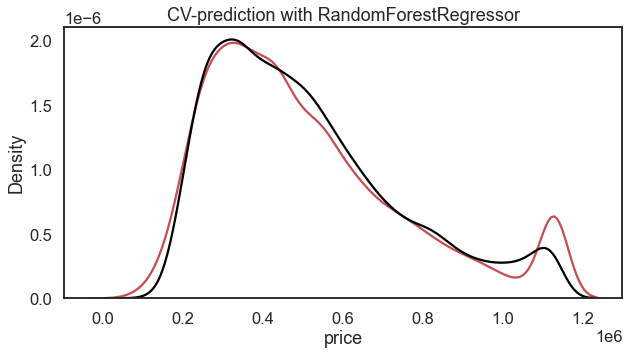

In [117]:
## RandomForestRegressor

RFR=RandomForestRegressor(n_estimators=150, random_state = 42)
RFR.fit(x_train,y_train)

from sklearn.model_selection import  cross_val_score,cross_val_predict
cv_RFR=cross_val_score(RFR,x_train,y_train,cv=10)
cv_RFR_pred=cross_val_predict(RFR,x_train,y_train,cv=10)

print("Score: ",r2_score(y_train,cv_RFR_pred))
model.append("RandomForestRegressor")
score.append(r2_score(y_train,cv_RFR_pred)) 

#Visualisation
f,ax3=plt.subplots(figsize=(10, 5))
ax3=sns.distplot(y_train,hist=False,label='Y-Train',color='r')
sns.distplot(cv_RFR_pred,hist=False,label='Y-Pred-CV',ax=ax3,color='black')
plt.title("CV-prediction with RandomForestRegressor")

In [ ]:
#AdaBoostRegressor

ABR=AdaBoostRegressor(n_estimators=6,random_state=42)
ABR.fit(x_train,y_train)

from sklearn.model_selection import  GridSearchCV
parameters1=[{'n_estimators':[10,20,30,40,50,60,70,80,90,100,110]}]
Grid1=GridSearchCV(RFR,parameters1,cv=15)
Grid1.fit(x_train,y_train)
Grid1.best_estimator_
scores=Grid1.cv_results_
print(scores['mean_test_score'])

from sklearn.model_selection import  cross_val_score,cross_val_predict
cv_ABR=cross_val_score(ABR,x_train,y_train,cv=5)
cv_ABR_pred=cross_val_predict(ABR,x_train,y_train,cv=5)

print("Score: ",r2_score(y_train,cv_ABR_pred))
model.append("AdaBoostRegressor")
score.append(r2_score(y_train,cv_ABR_pred)) 

#Visaulisation
f,ax3=plt.subplots(figsize=(10, 5))
ax3=sns.distplot(y_train,hist=False,label='Y-Train',color='r')
sns.distplot(cv_ABR_pred,hist=False,label='Y-Pred-CV',ax=ax3,color='black')
plt.title("CV-prediction with AdaBoostRegressor")

Score:  0.872514049150273


Text(0.5, 1.0, 'CV-prediction with GradientBoostingRegressor')

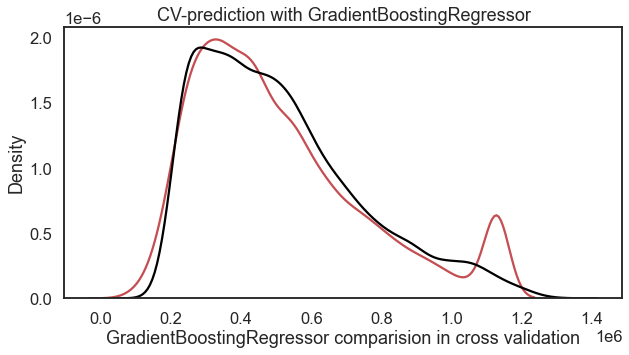

In [119]:
#GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)

from sklearn.model_selection import  cross_val_score,cross_val_predict
cv_GBR=cross_val_score(GBR,x_train,y_train,cv=10)
cv_GBR_pred=cross_val_predict(GBR,x_train,y_train,cv=10)

print("Score: ",r2_score(y_train,cv_GBR_pred))
model.append("AdaBoostRegressor")
score.append(r2_score(y_train,cv_GBR_pred)) 

#Visaulisation
f,ax3=plt.subplots(figsize=(10, 5))
ax3=sns.distplot(y_train,hist=False,label='Y-Train',color='r', axlabel='GradientBoostingRegressor comparision in cross validation')
sns.distplot(cv_GBR_pred,hist=False,label='Y-Pred-CV',ax=ax3,color='black')
plt.title("CV-prediction with GradientBoostingRegressor")

Score:  0.8956343657226444


Text(0.5, 1.0, 'CV-prediction with XGBRegressor')

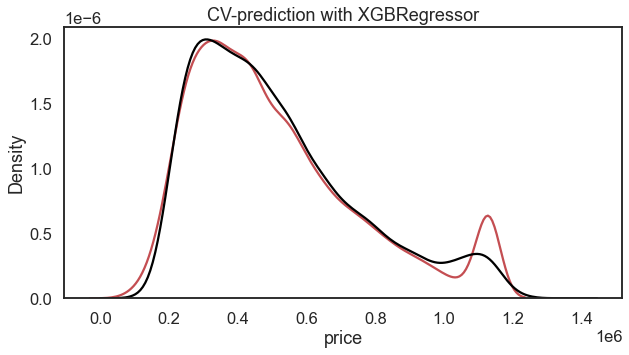

In [120]:
#XGBRegressor

XGBR=XGBRegressor()
XGBR.fit(x_train,y_train)

from sklearn.model_selection import  cross_val_score,cross_val_predict
cv_XGBR=cross_val_score(XGBR,x_train,y_train,cv=10)
cv_XGBR_pred=cross_val_predict(XGBR,x_train,y_train,cv=10)

print("Score: ",r2_score(y_train,cv_XGBR_pred))
model.append("XGBRegressor")
score.append(r2_score(y_train,cv_XGBR_pred)) 

#Visaulisation
f,ax3=plt.subplots(figsize=(10, 5))
ax3=sns.distplot(y_train,hist=False,label='Y-Train',color='r')
sns.distplot(cv_XGBR_pred,hist=False,label='Y-Pred-CV',ax=ax3,color='black')
plt.title("CV-prediction with XGBRegressor")

# Predictions

Score:  0.7511117224453325


Text(0.5, 1.0, 'Prediction with test features in LinearRegression')

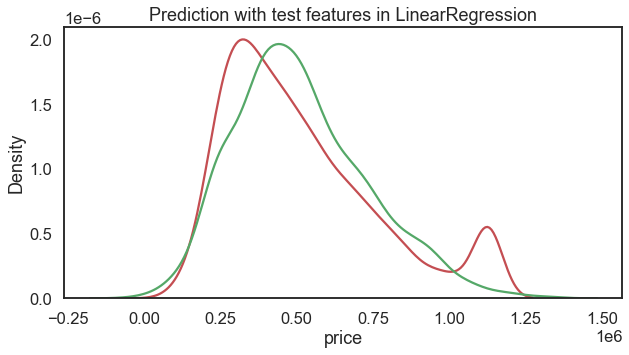

In [161]:
#LinearRegression
LinReg.fit(x_train,y_train)
LinReg_pred=LinReg.predict(x_test)

print("Score: ",r2_score(y_test,LinReg_pred))
model_pred.append("Linear Regression")
score_pred.append(r2_score(y_test,LinReg_pred))

#Visualisation
f,ax3=plt.subplots(figsize=(10, 5))
ax3=sns.distplot(y_test,hist=False,label='Y-Train',color='r')
sns.distplot(LinReg_pred,hist=False,label='Y-Pred-CV',ax=ax3,color='g')
plt.title("Prediction with test features in LinearRegression")

Score:  0.751109810824846


Text(0.5, 1.0, 'Prediction with test features in Ridge')

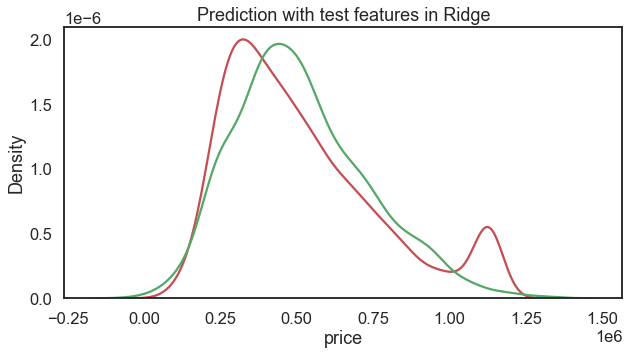

In [164]:
#Ridge

Rge.fit(x_train,y_train)
Rge_pred=Rge.predict(x_test)

print("Score: ",r2_score(y_test,Rge_pred))
model_pred.append("Ridge")
score_pred.append(r2_score(y_test,Rge_pred))

#Visualisation
f,ax3=plt.subplots(figsize=(10, 5))
ax3=sns.distplot(y_test,hist=False,label='Y-Train',color='r')
sns.distplot(Rge_pred,hist=False,label='Y-Pred-CV',ax=ax3,color='g')
plt.title("Prediction with test features in Ridge")

Score:  0.7511109142625748


Text(0.5, 1.0, 'Prediction with test features in Lasso')

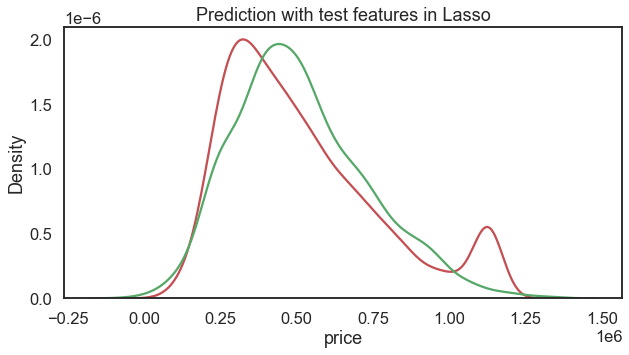

In [166]:
#Lasso

LSO.fit(x_train,y_train)
LSO_pred=LSO.predict(x_test)

print("Score: ",r2_score(y_test,LSO_pred))
model_pred.append("Lasso")
score_pred.append(r2_score(y_test,LSO_pred))

#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_test,hist=False,label='Y-Train',color='r')
sns.distplot(LSO_pred,hist=False,label='Y-Pred-CV',ax=ax,color='g')
plt.title("Prediction with test features in Lasso")

Score:  0.6486101174530241


Text(0.5, 1.0, 'Prediction with test features in ElasticNet')

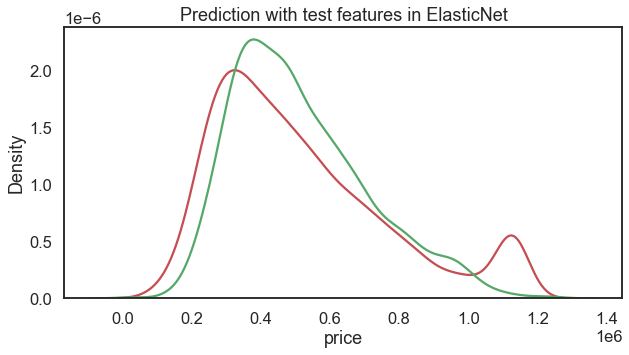

In [167]:
#ElasticNet

ELN.fit(x_train,y_train)
ELN_pred=ELN.predict(x_test)

print("Score: ",r2_score(y_test,ELN_pred))
model_pred.append("ElasticNet")
score_pred.append(r2_score(y_test,ELN_pred))

#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_test,hist=False,label='Y-Train',color='r')
sns.distplot(ELN_pred,hist=False,label='Y-Pred-CV',ax=ax,color='g')
plt.title("Prediction with test features in ElasticNet")

Score:  0.7831388276743052


Text(0.5, 1.0, 'Prediction with test features in DecisionTreeRegressor')

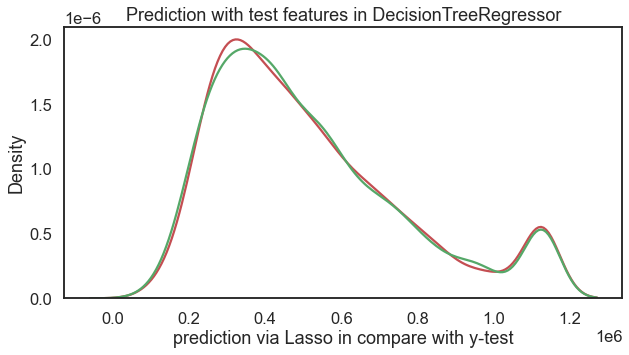

In [168]:
#DecisionTreeRegressor

DTR.fit(x_train,y_train)
DTR_pred=DTR.predict(x_test)

print("Score: ",r2_score(y_test,DTR_pred))
model_pred.append("DecisionTreeRegressor")
score_pred.append(r2_score(y_test,DTR_pred))

#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_test,hist=False,label='Y-Train',color='r', axlabel='prediction via Lasso in compare with y-test')
sns.distplot(DTR_pred,hist=False,label='Y-Pred-CV',ax=ax,color='g')
plt.title("Prediction with test features via DecisionTreeRegressor")

Score:  0.8916307487223741


Text(0.5, 1.0, 'Prediction with test features via RandomForestRegressor')

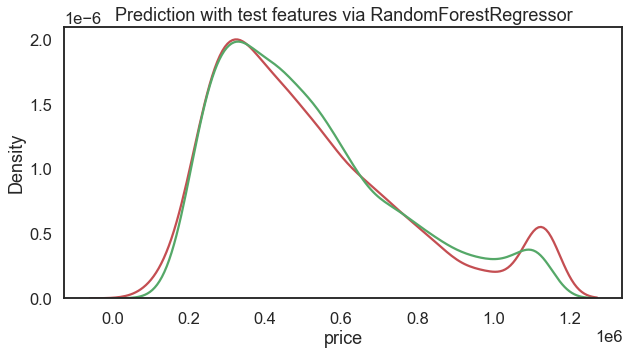

In [172]:
#RandomForestRegressor

RFR.fit(x_train,y_train)
RFR_pred=RFR.predict(x_test)

print("Score: ",r2_score(y_test,RFR_pred))
model_pred.append("RandomForestRegressor")
score_pred.append(r2_score(y_test,RFR_pred))

#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_test,hist=False,label='Y-Train',color='r')
sns.distplot(RFR_pred,hist=False,label='Y-Pred-CV',ax=ax,color='g')
plt.title("Prediction with test features via RandomForestRegressor")

Score:  0.7475359963471502


Text(0.5, 1.0, 'Prediction with test features via AdaBoostRegressor')

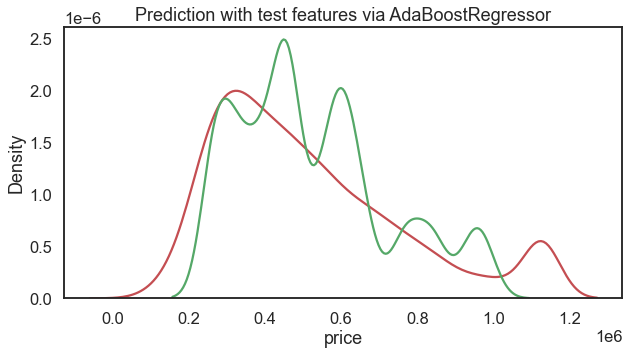

In [127]:
#AdaBoostRegressor
ABR.fit(x_train,y_train)
ABR_pred=ABR.predict(x_test)

print("Score: ",r2_score(y_test,ABR_pred))
model_pred.append("AdaBoostRegressor")
score_pred.append(r2_score(y_test,ABR_pred))

#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_test,hist=False,label='Y-Train',color='r')
sns.distplot(ABR_pred,hist=False,label='Y-Pred-CV',ax=ax,color='g')
plt.title("Prediction with test features via AdaBoostRegressor")

Score:  0.8720786577162079


Text(0.5, 1.0, 'Prediction with test features via GradientBoostingRegressor')

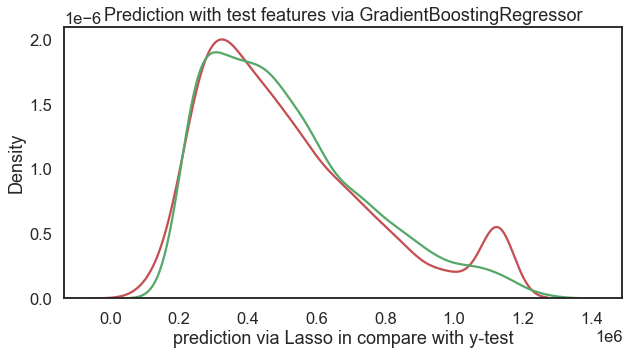

In [128]:
#GradientBoostingRegressor

GBR.fit(x_train,y_train)
GBR_pred=GBR.predict(x_test)

print("Score: ",r2_score(y_test,GBR_pred))
model_pred.append("GradientBoostingRegressor")
score_pred.append(r2_score(y_test,GBR_pred))

#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_test,hist=False,label='Y-Train',color='r', axlabel='prediction via Lasso in compare with y-test')
sns.distplot(GBR_pred,hist=False,label='Y-Pred-CV',ax=ax,color='g')
plt.title("Prediction with test features via GradientBoostingRegressor")

Score:  0.8720786577162079


Text(0.5, 1.0, 'Prediction with test features via XGBRegressor')

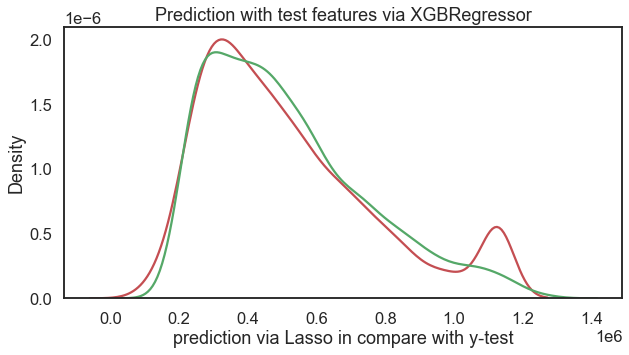

In [129]:
#XGBRegressor

XGBR.fit(x_train,y_train)
XGBR_pred=GBR.predict(x_test)

print("Score: ",r2_score(y_test,XGBR_pred))
score_pred.append(r2_score(y_test,XGBR_pred))

#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_test,hist=False,label='Y-Train',color='r', axlabel='prediction via Lasso in compare with y-test')
sns.distplot(XGBR_pred,hist=False,label='Y-Pred-CV',ax=ax,color='g')
plt.title("Prediction with test features via XGBRegressor")

In [130]:
#R2-Score in CV and MSE in test comparision
print('The comparision of R2-Score between of predictions in CV with train data and predictions with test data:')
print('')

print('R2-Score via CV:    \t\t\t\t R2-Score with test data:')
print('LinearRegression: %8.3f \t\t\t LinearRegression: %8.3f'%(r2_score(y_train,cv_LinReg_pred),r2_score(y_test,LinReg_pred)))       
print('RidgeRegression:  %8.3f \t\t\t RidgeRegression:  %8.3f'%(r2_score(y_train,cv_Rge_pred),r2_score(y_test,Rge_pred)))  
print('LassoRegression:  %8.3f \t\t\t LassoRegression:  %8.3f'%(r2_score(y_train,cv_LSO_pred),r2_score(y_test,LSO_pred)))
print('ElasticNet:       %8.3f \t\t\t ElasticNet:       %8.3f'%(r2_score(y_train,cv_ELN_pred),r2_score(y_test,ELN_pred)))
print('DecisionTree:     %8.3f \t\t\t DecisionTree:     %8.3f'%(r2_score(y_train,cv_DTR_pred),r2_score(y_test,DTR_pred))) 
print('RandomForest:     %8.3f \t\t\t RandomForest:     %8.3f'%(r2_score(y_train,cv_RFR_pred),r2_score(y_test,RFR_pred))) 
print('AdaBoost:         %8.3f \t\t\t AdaBoost:         %8.3f'%(r2_score(y_train,cv_ABR_pred),r2_score(y_test,ABR_pred))) 
print('GradientBoosting: %8.3f \t\t\t GradientBoosting: %8.3f'%(r2_score(y_train,cv_ABR_pred),r2_score(y_test,ABR_pred))) 
print('XGBRegressorg:    %8.3f \t\t\t XGBRegressor:     %8.3f'%(r2_score(y_train,cv_XGBR_pred),r2_score(y_test,XGBR_pred))) 

The comparision of R2-Score between of predictions in CV with train data and predictions with test data:

R2-Score via CV:    				 R2-Score with test data:
LinearRegression:    0.748 			 LinearRegression:    0.751
RidgeRegression:     0.748 			 RidgeRegression:     0.751
LassoRegression:     0.748 			 LassoRegression:     0.751
ElasticNet:          0.713 			 ElasticNet:          0.717
DecisionTree:        0.779 			 DecisionTree:        0.786
RandomForest:        0.890 			 RandomForest:        0.892
AdaBoost:            0.738 			 AdaBoost:            0.748
GradientBoosting:    0.738 			 GradientBoosting:    0.748
XGBRegressorg:       0.896 			 XGBRegressor:        0.872


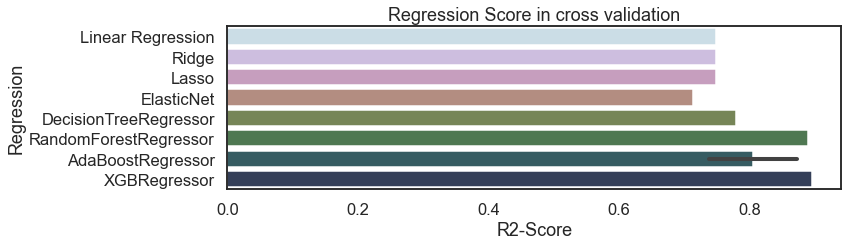

In [131]:
# Predictions of Cross Validation
plt.subplots(figsize=(11, 3))
sns.barplot(x=score,y=model,palette = sns.cubehelix_palette(len(score),rot=21))
plt.xlabel("R2-Score")
plt.ylabel("Regression")
plt.title('Regression Score in cross validation')
plt.show()

In [132]:
#MSE in CV and MSE in test comparision
print('The comparision of MSE between of predictions in CV with train data and predictions with test data:')
print('')

print('Predictions via CV:   \t\t\t         Predictions with test data:')
print('LinearRegression: %d \t\t\t LinearRegression: %d'%(mean_absolute_error(y_train,cv_LinReg_pred),mean_absolute_error(y_test,LinReg_pred)))       
print('RidgeRegression:  %d \t\t\t RidgeRegression:  %d'%(mean_absolute_error(y_train,cv_Rge_pred),mean_absolute_error(y_test,Rge_pred)))  
print('LassoRegression:  %d \t\t\t LassoRegression:  %d'%(mean_absolute_error(y_train,cv_LSO_pred),mean_absolute_error(y_test,LSO_pred)))
print('ElasticNet:       %d \t\t\t ElasticNet:       %d'%(mean_absolute_error(y_train,cv_ELN_pred),mean_absolute_error(y_test,ELN_pred)))
print('DecisionTree:     %d \t\t\t DecisionTree:     %d'%(mean_absolute_error(y_train,cv_DTR_pred),mean_absolute_error(y_test,DTR_pred))) 
print('RandomForest:     %d \t\t\t RandomForest:     %d'%(mean_absolute_error(y_train,cv_RFR_pred),mean_absolute_error(y_test,RFR_pred))) 
print('AdaBoost:         %d \t\t\t AdaBoost:         %d'%(mean_absolute_error(y_train,cv_ABR_pred),mean_absolute_error(y_test,ABR_pred))) 
print('GradientBoosting: %d \t\t\t GradientBoosting: %d'%(mean_absolute_error(y_train,cv_ABR_pred),mean_absolute_error(y_test,ABR_pred))) 
print('XGBRegressorg:    %d \t\t\t XGBRegressor:     %d'%(mean_absolute_error(y_train,cv_XGBR_pred),mean_absolute_error(y_test,XGBR_pred))) 

The comparision of MSE between of predictions in CV with train data and predictions with test data:

Predictions via CV:   			         Predictions with test data:
LinearRegression: 94808 			 LinearRegression: 95476
RidgeRegression:  94809 			 RidgeRegression:  95477
LassoRegression:  94808 			 LassoRegression:  95476
ElasticNet:       102279 			 ElasticNet:       102406
DecisionTree:     78501 			 DecisionTree:     79003
RandomForest:     55932 			 RandomForest:     56549
AdaBoost:         98207 			 AdaBoost:         96699
GradientBoosting: 98207 			 GradientBoosting: 96699
XGBRegressorg:    55389 			 XGBRegressor:     64496


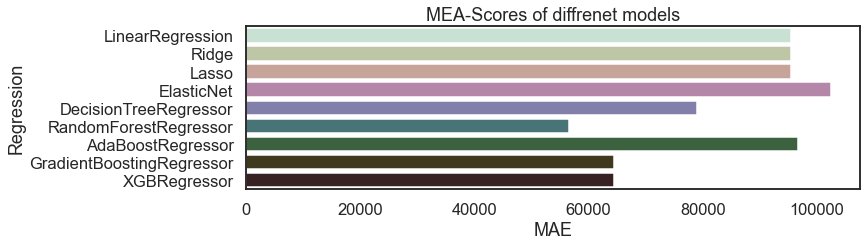

In [143]:
MAE=[]
Regressor=[]

MAE.append(mean_absolute_error(y_test,LinReg_pred)),Regressor.append('LinearRegression')
MAE.append(mean_absolute_error(y_test,Rge_pred)),Regressor.append('Ridge')
MAE.append(mean_absolute_error(y_test,LSO_pred)),Regressor.append('Lasso')
MAE.append(mean_absolute_error(y_test,ELN_pred)),Regressor.append('ElasticNet')
MAE.append(mean_absolute_error(y_test,DTR_pred)),Regressor.append('DecisionTreeRegressor')
MAE.append(mean_absolute_error(y_test,RFR_pred)),Regressor.append('RandomForestRegressor')
MAE.append(mean_absolute_error(y_test,ABR_pred)),Regressor.append('AdaBoostRegressor')
MAE.append(mean_absolute_error(y_test,GBR_pred)),Regressor.append('GradientBoostingRegressor')
MAE.append(mean_absolute_error(y_test,XGBR_pred)),Regressor.append('XGBRegressor')

plt.subplots(figsize=(11, 3))
sns.barplot(x=MAE,y=Regressor,palette = sns.cubehelix_palette(len(MAE),rot=2))
plt.xlabel("MAE")
plt.ylabel("Regression")
plt.title('MEA-Scores of diffrenet models')
plt.show()

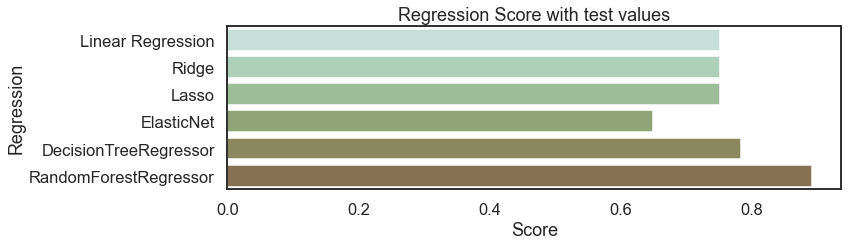

In [173]:
# Visualisation of predictions in CV with 10 fold
plt.subplots(figsize=(11, 3))
sns.barplot(x=score_pred,y=model_pred,palette = sns.cubehelix_palette(len(score_pred),rot=0.9))
plt.xlabel("Score")
plt.ylabel("Regression")
plt.title('Regression Score with test values')
plt.show()